In [1]:
import seaborn_plot_util
%matplotlib notebook
import re
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import sys
from scipy import stats
import seaborn_plot_util
import pprint
import json
import os
from pathlib import Path
import util
from importlib import reload

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint

nlp = spacy.load("en_core_web_md")

/home/madhu/dataset-analysis-new/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Saving the plot in  ../saves/dataset_length/dataset_length_dist_sent_level_amz


/home/madhu/dataset-analysis-new/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<IPython.core.display.Javascript object>


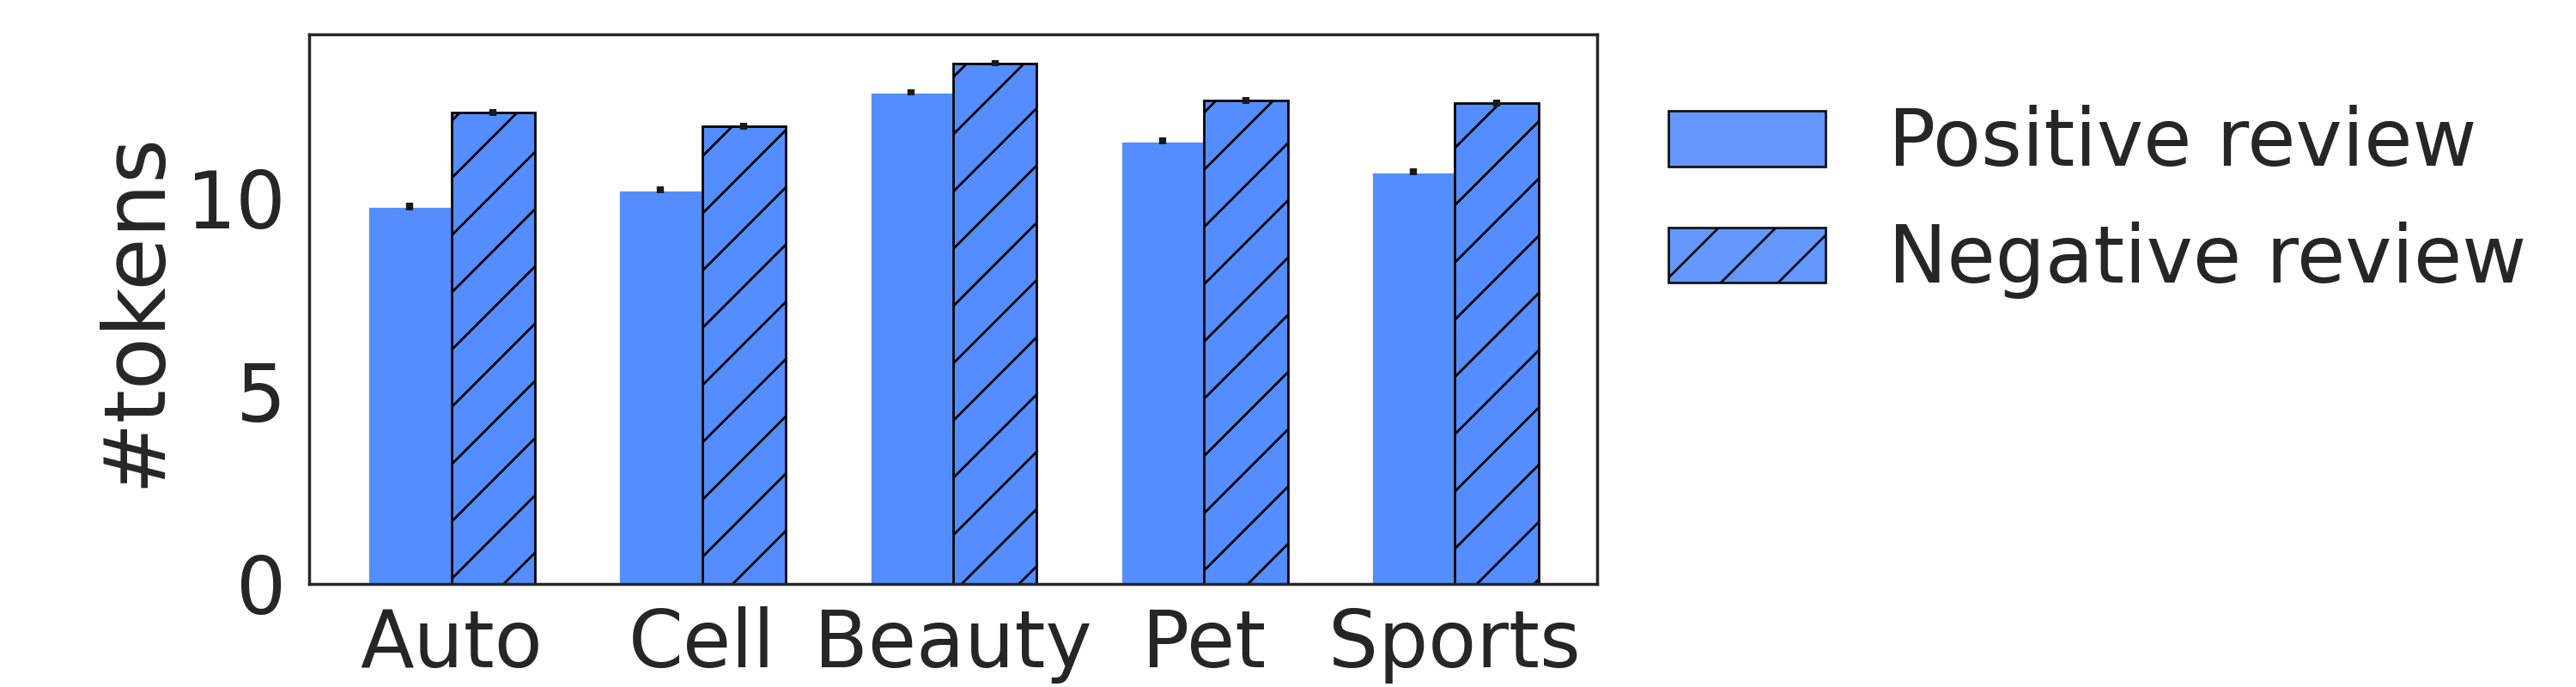

     name      value  sem_value          category
4  Auto    9.776174   0.090492   positive reviews
5  Auto    12.208955  0.089511   negative reviews
0  Cell    10.207675  0.089809   positive reviews
1  Cell    11.853364  0.086042   negative reviews
8  Beauty  12.735857  0.084016   positive reviews
9  Beauty  13.480890  0.075740   negative reviews
2  Pet     11.476551  0.085013   positive reviews
3  Pet     12.520594  0.080310   negative reviews
6  Sports  10.675409  0.089093   positive reviews
7  Sports  12.455849  0.084236   negative reviews
Saving the plot in  ../saves/dataset_length/dataset_length_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


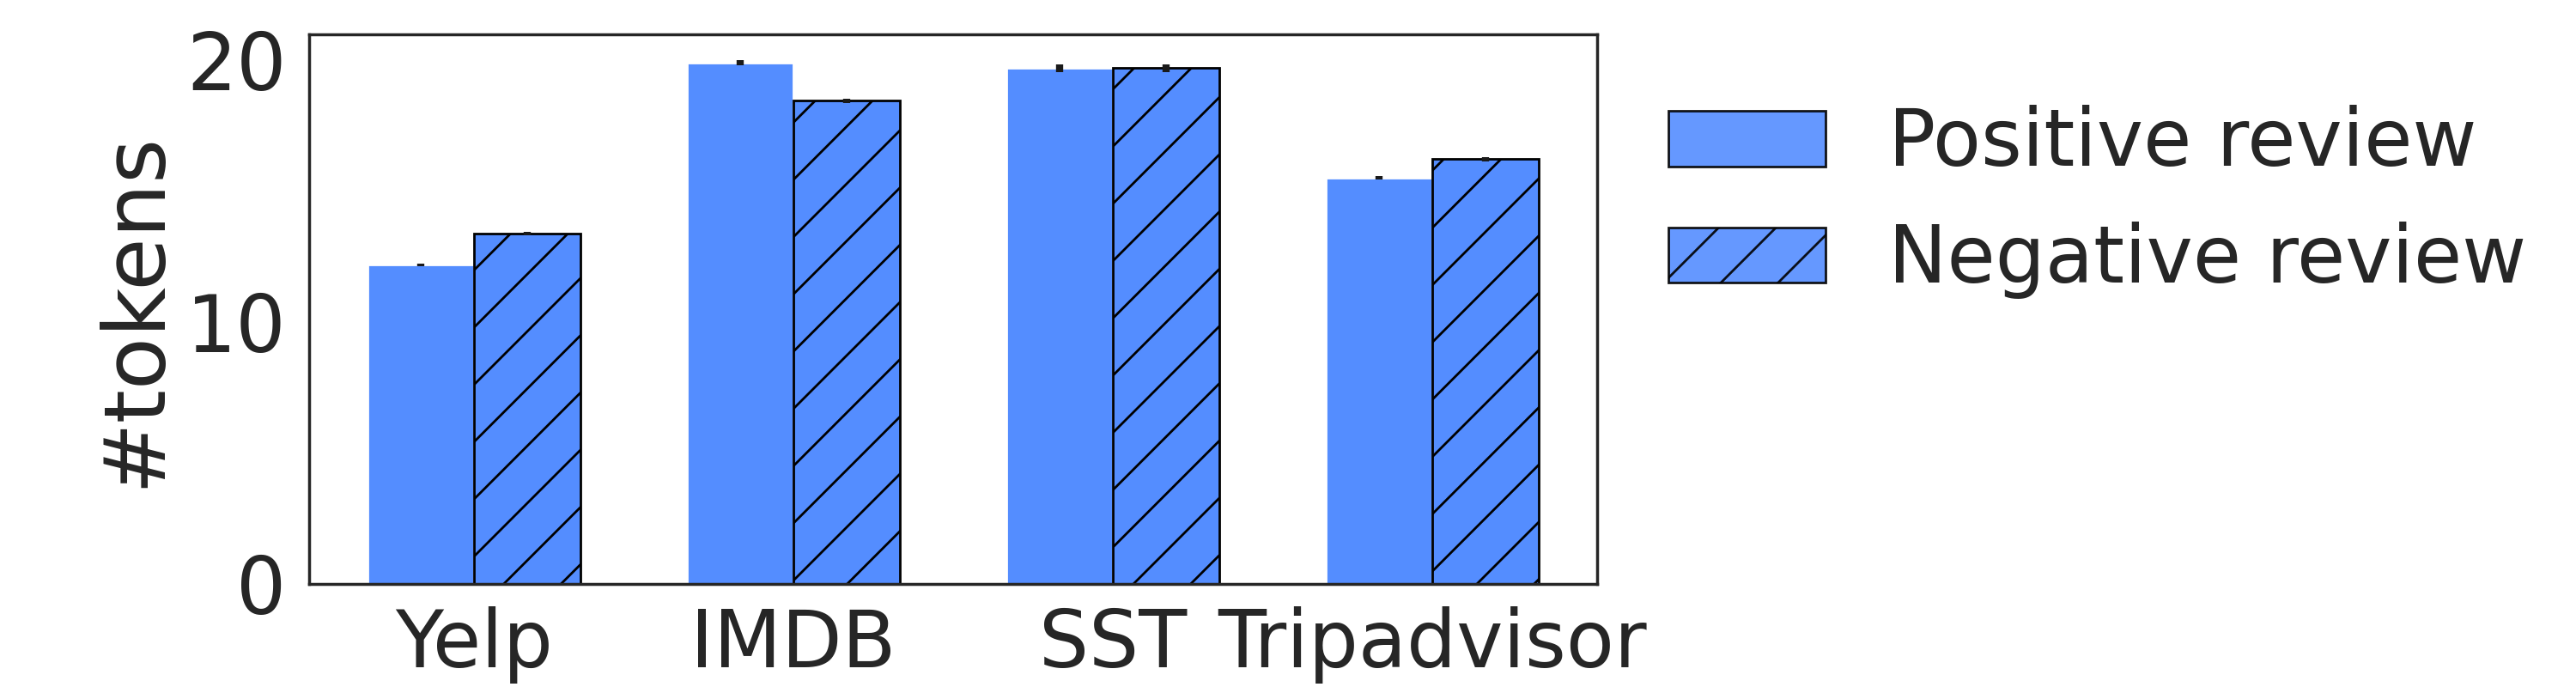

          name      value  sem_value          category
2  Yelp         12.178076  0.058820   positive reviews
3  Yelp         13.367856  0.061318   negative reviews
4  IMDB         19.885488  0.093999   positive reviews
5  IMDB         18.443841  0.084844   negative reviews
0  SST          19.689963  0.137692   positive reviews
1  SST          19.688613  0.142586   negative reviews
6  Tripadvisor  15.495058  0.072362   positive reviews
7  Tripadvisor  16.210714  0.074441   negative reviews
Saving the plot in  ../saves/dataset_length/dataset_length_dist_review_level_amz


<IPython.core.display.Javascript object>


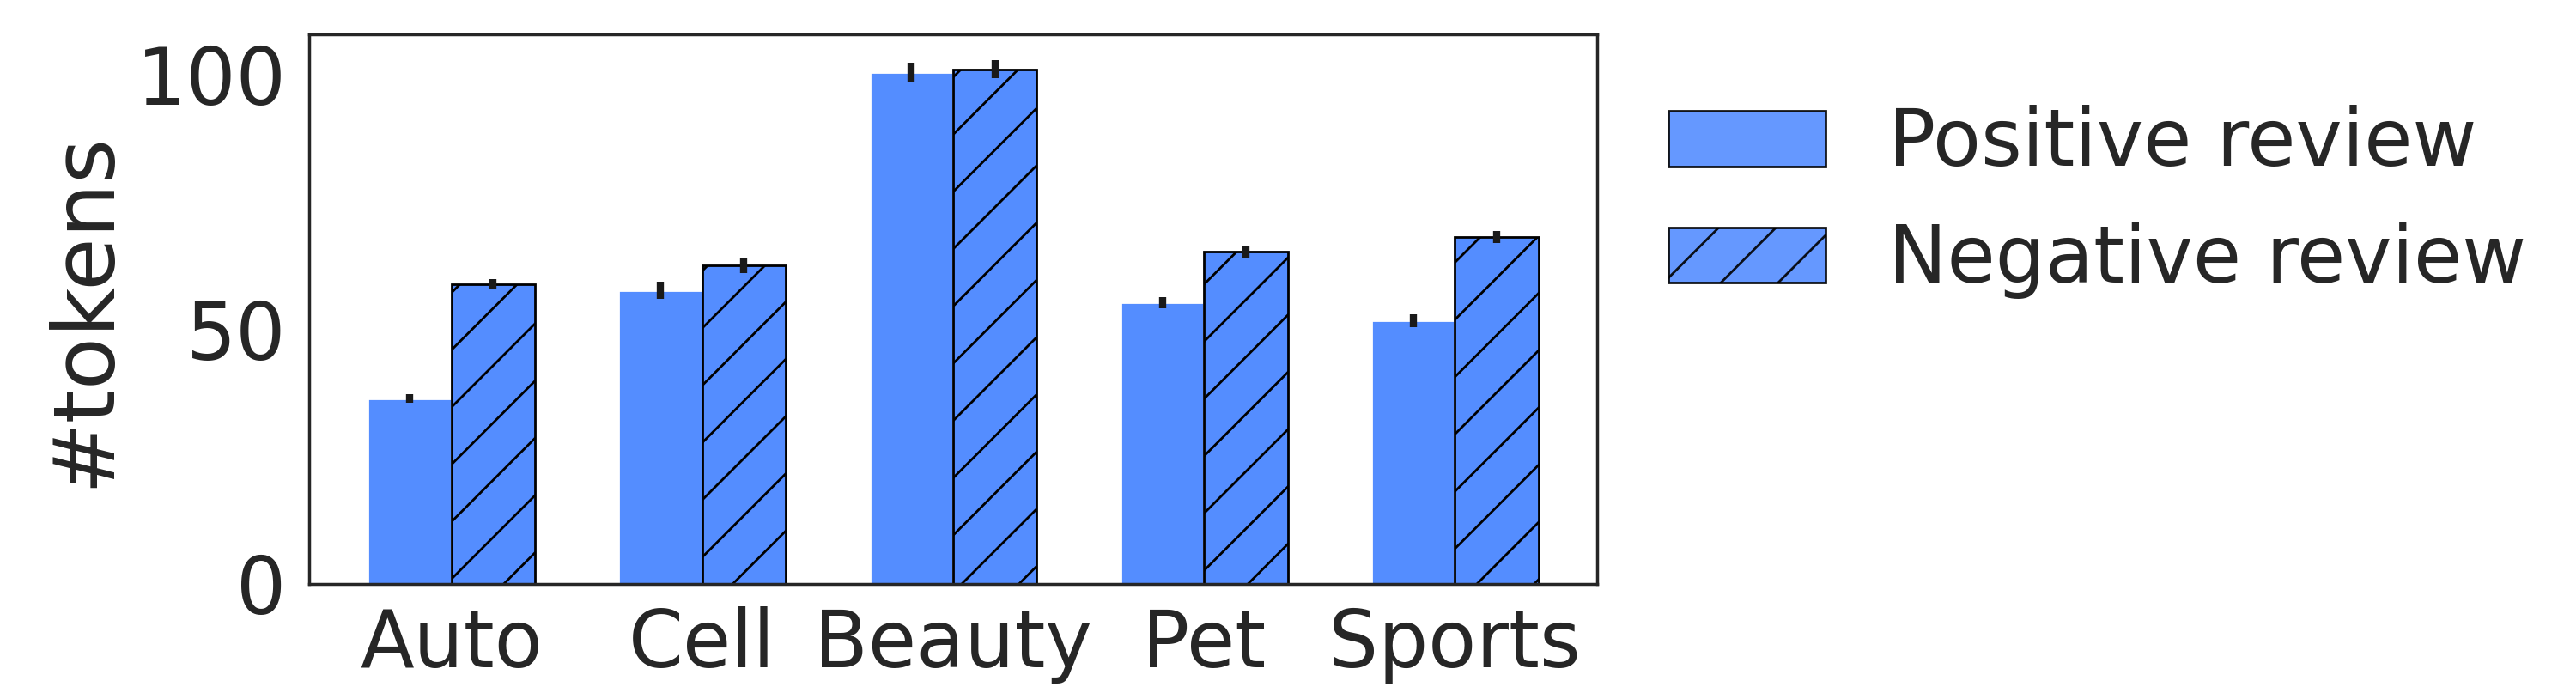

     name     value  sem_value          category
4  Auto    36.4756   0.850558   positive reviews
5  Auto    58.8148   1.057286   negative reviews
0  Cell    57.6182   1.654486   positive reviews
1  Cell    62.5172   1.511617   negative reviews
8  Beauty  100.4814  1.827919   positive reviews
9  Beauty  101.0236  1.720268   negative reviews
2  Pet     55.2778   1.092474   positive reviews
3  Pet     65.1892   1.246845   negative reviews
6  Sports  51.7040   1.293428   positive reviews
7  Sports  68.1018   1.252957   negative reviews
Saving the plot in  ../saves/dataset_length/dataset_length_dist_review_level_non_amz


<IPython.core.display.Javascript object>


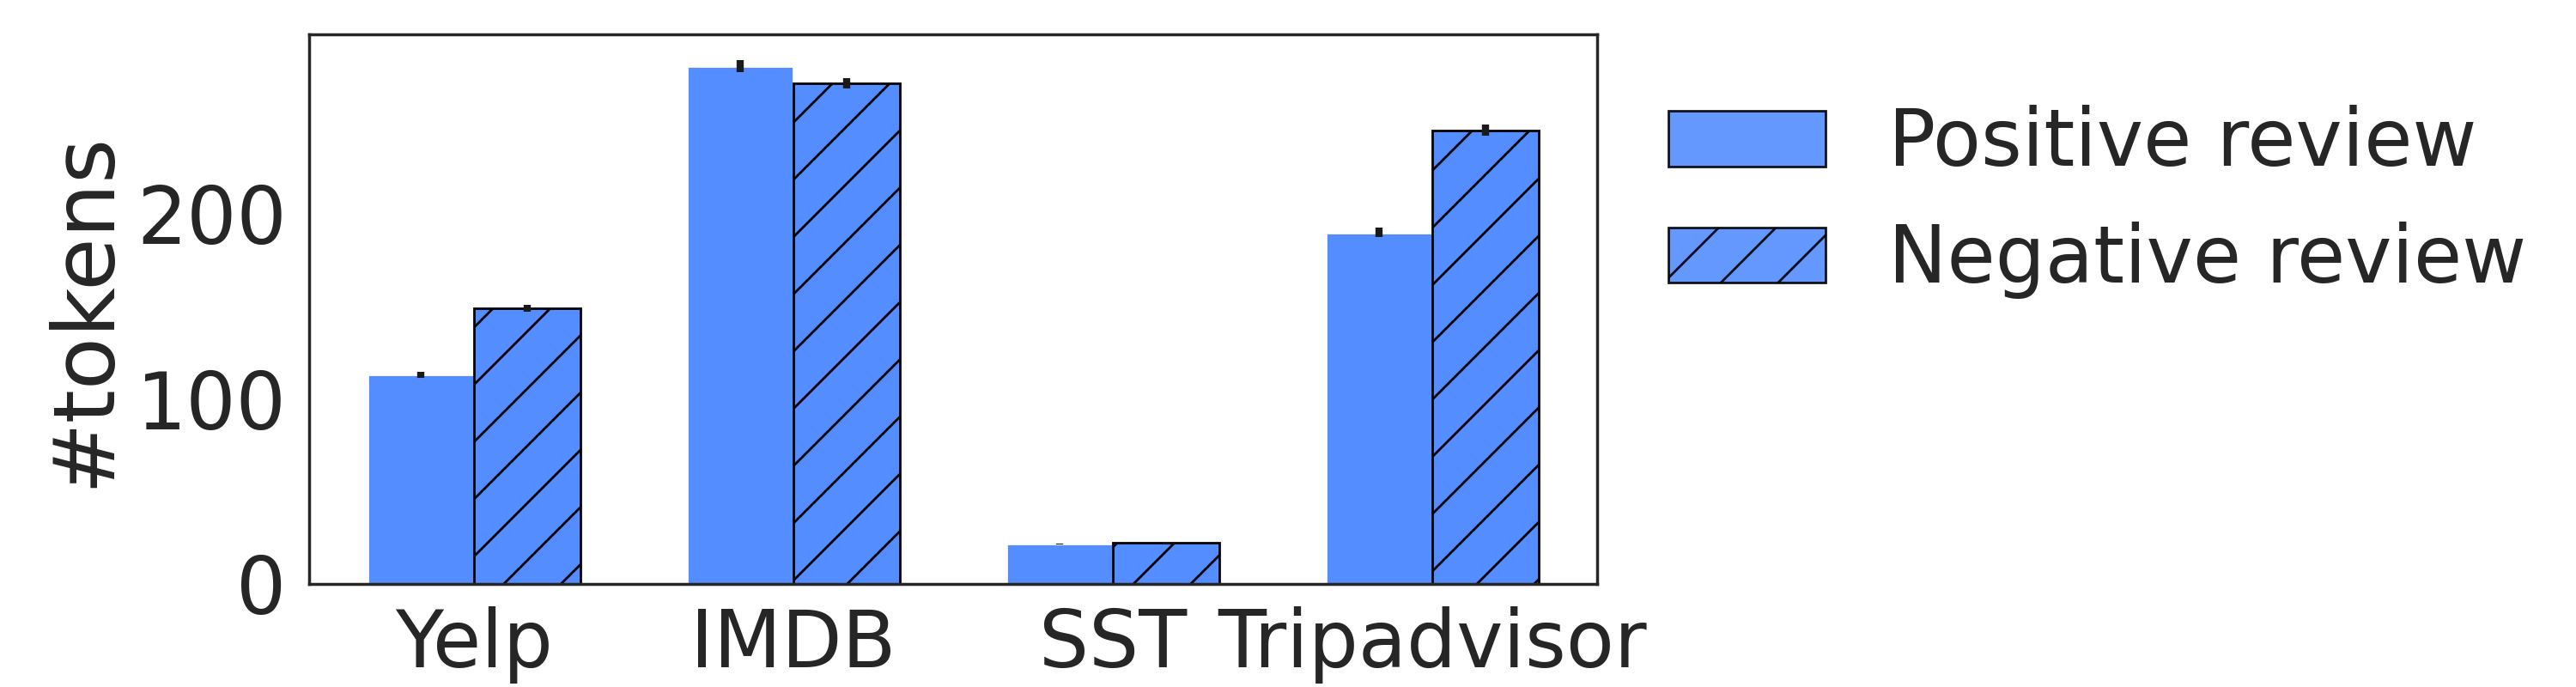

          name       value  sem_value          category
2  Yelp         112.793800  1.585105   positive reviews
3  Yelp         148.420400  1.830503   negative reviews
4  IMDB         279.130200  3.061015   positive reviews
5  IMDB         270.066400  2.782047   negative reviews
0  SST          21.553870   0.147621   positive reviews
1  SST          22.111861   0.150975   negative reviews
6  Tripadvisor  189.386200  2.565225   positive reviews
7  Tripadvisor  244.581200  3.034296   negative reviews


In [3]:
# Dataset length distribution
saves_dir = os.path.join("../saves", "dataset_length")
Path(saves_dir).mkdir(parents=True, exist_ok=True)       
preload_flag = True
plot_data={
    "sent_level": [],
    "review_level": []
}
analysis_types = list(plot_data.keys())
plot_save_prefix = "dataset_length_dist"
plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))["plot_data"]

reload(seaborn_plot_util)

for a_type in analysis_types:
    plot_data_amz, plot_data_non_amz = util.filter_amazon(plot_data[a_type])
    
    seaborn_plot_util.draw_grouped_barplot_two_subbars(plot_data_amz, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+a_type+"_amz"),
        figsize=(15, 4), 
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=True)
    
    
    seaborn_plot_util.draw_grouped_barplot_two_subbars(plot_data_non_amz, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+a_type+"_non_amz"),
        figsize=(15, 4), 
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=False)
    